# Análise Exploratória dos dados do dataset `trabalho2_dados_7.csv` (posts do instagram)


In [1]:
from functools import reduce
from utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('trabalho2_dados_7.csv')

### Identifica variáveis, tipos, valores nulos e duplicatas

In [2]:
df.describe()

,id,engagement_score_view,followers,likes,num_comments,video_view_count,has_a_person,vape_present,is_vaping,img_mentions_brands,text_mentions_brands,Health_ad,are_there_children,is_vape_related,sensitive_content_bool
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.0,1400.000000
mean,1101.923571,19.764286,2119.847143,21.001429,1.147143,19.764286,0.432857,0.290000,0.070714,0.272143,0.154286,0.840714,0.037143,1.0,0.048571
std,616.899821,301.491250,16349.970442,81.740353,4.281523,301.491250,0.495648,0.453924,0.256439,0.445222,0.361351,0.366073,0.189179,0.0,0.215047
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,583.000000,0.000000,158.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000
50%,1113.000000,0.000000,417.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,0.000000
75%,1635.000000,0.000000,1167.500000,14.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000
max,2132.000000,7771.000000,563673.000000,1768.000000,63.000000,7771.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [3]:
print(df.dtypes)

id                             int64
url                           object
display_url                   object
content_type                  object
engagement_score_view          int64
followers                      int64
likes                          int64
num_comments                   int64
product_type                  object
profile_image_link            object
video_view_count               int64
videos                        object
tags                          object
has_a_person                   int64
vape_present                   int64
is_vaping                      int64
tone                          object
img_mentions_brands            int64
text_mentions_brands           int64
Health_ad                      int64
target_demographic            object
location_type                 object
emotion_displayed             object
type_of_content               object
stance                        object
are_there_children             int64
post_style                    object
p

In [4]:
df

,id,url,display_url,content_type,engagement_score_view,followers,likes,num_comments,product_type,profile_image_link,...,post_style,people_skin_color,people_gender,people_age_group,people_physical_attributes,people_hair_color,people_common_appearances,depiction_style,is_vape_related,sensitive_content_bool
0,189,https://www.instagram.com/p/CJ80XswANaO/,https://www.instagram.com/p/CJ80XswANaO/media/...,Image,0,1792,3,0,NaN,https://scontent-man2-1.cdninstagram.com/v/t51...,...,Informational Announcement,[],[],[],[],[],[],NaN,1,0
1,1340,https://www.instagram.com/p/C3V6TndvA6B/,https://www.instagram.com/p/C3V6TndvA6B/media/...,Image,0,159,2,0,NaN,https://instagram.flpb1-1.fna.fbcdn.net/v/t51....,...,"Informational, Educational",[],[],[],[],[],[],NaN,1,0
2,591,https://www.instagram.com/p/B_1KaA9FRwS/,https://www.instagram.com/p/B_1KaA9FRwS/media/...,Image,0,10174,12,0,NaN,https://scontent-muc2-1.cdninstagram.com/v/t51...,...,Informational Promotion,[],[],[],[],[],[],NaN,1,0
3,553,https://www.instagram.com/p/CN-XV1crfjx/,https://www.instagram.com/p/CN-XV1crfjx/media/...,Image,0,9,3,0,NaN,https://instagram.ftun10-2.fna.fbcdn.net/v/t51...,...,Humor,[],"['Female', 'Male']",['Young'],[],[],['casual'],Neutral,1,0
4,1738,https://www.instagram.com/p/CgCT8H5oSdo/,https://www.instagram.com/p/CgCT8H5oSdo/media/...,Image,0,318,7,0,NaN,https://instagram.famm11-1.fna.fbcdn.net/v/t51...,...,Personal Reflection,[],[],[],[],[],[],NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,329,https://www.instagram.com/p/Cq9nuLUOzaj/,https://www.instagram.com/p/Cq9nuLUOzaj/media/...,Image,0,521,71,3,NaN,https://instagram.famm8-1.fna.fbcdn.net/v/t51....,...,Personal Reflection,['light'],['Male'],['Adult'],['average'],['other'],['casual'],Neutral,1,0
1396,41,https://www.instagram.com/p/CgntvQBvQPe/,https://www.instagram.com/p/CgntvQBvQPe/media/...,Image,0,306,1,0,NaN,https://instagram.fcxl1-2.fna.fbcdn.net/v/t51....,...,Informational Promotion,"['medium', 'dark']",['Female'],"['Young', 'Adult']",['average'],['black'],['casual'],Attractive,1,0
1397,1733,https://www.instagram.com/p/CdlM9MGMKuY/,https://www.instagram.com/p/CdlM9MGMKuY/media/...,Carousel,0,4501,13,0,NaN,https://instagram.flpb1-1.fna.fbcdn.net/v/t51....,...,Informational Promotion,['light'],['Male'],['Adult'],['average'],[],['casual'],Neutral,1,0
1398,2069,https://www.instagram.com/p/CKziqkLrixB/,https://www.instagram.com/p/CKziqkLrixB/media/...,Image,0,39,18,0,NaN,https://instagram.fsrz4-1.fna.fbcdn.net/v/t51....,...,Informational Campaign,[],[],[],[],[],[],NaN,1,0


In [5]:
df = df[~df.duplicated()]
df

,id,url,display_url,content_type,engagement_score_view,followers,likes,num_comments,product_type,profile_image_link,...,post_style,people_skin_color,people_gender,people_age_group,people_physical_attributes,people_hair_color,people_common_appearances,depiction_style,is_vape_related,sensitive_content_bool
0,189,https://www.instagram.com/p/CJ80XswANaO/,https://www.instagram.com/p/CJ80XswANaO/media/...,Image,0,1792,3,0,NaN,https://scontent-man2-1.cdninstagram.com/v/t51...,...,Informational Announcement,[],[],[],[],[],[],NaN,1,0
1,1340,https://www.instagram.com/p/C3V6TndvA6B/,https://www.instagram.com/p/C3V6TndvA6B/media/...,Image,0,159,2,0,NaN,https://instagram.flpb1-1.fna.fbcdn.net/v/t51....,...,"Informational, Educational",[],[],[],[],[],[],NaN,1,0
2,591,https://www.instagram.com/p/B_1KaA9FRwS/,https://www.instagram.com/p/B_1KaA9FRwS/media/...,Image,0,10174,12,0,NaN,https://scontent-muc2-1.cdninstagram.com/v/t51...,...,Informational Promotion,[],[],[],[],[],[],NaN,1,0
3,553,https://www.instagram.com/p/CN-XV1crfjx/,https://www.instagram.com/p/CN-XV1crfjx/media/...,Image,0,9,3,0,NaN,https://instagram.ftun10-2.fna.fbcdn.net/v/t51...,...,Humor,[],"['Female', 'Male']",['Young'],[],[],['casual'],Neutral,1,0
4,1738,https://www.instagram.com/p/CgCT8H5oSdo/,https://www.instagram.com/p/CgCT8H5oSdo/media/...,Image,0,318,7,0,NaN,https://instagram.famm11-1.fna.fbcdn.net/v/t51...,...,Personal Reflection,[],[],[],[],[],[],NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,862,https://www.instagram.com/p/CWBsJi-P1kO/,https://www.instagram.com/p/CWBsJi-P1kO/media/...,Image,0,183,4,0,NaN,https://instagram.fbeg5-1.fna.fbcdn.net/v/t51....,...,Informational,[],[],[],[],[],[],NaN,1,0
1392,1218,https://www.instagram.com/p/C74cC1fh15c/,https://www.instagram.com/p/C74cC1fh15c/media/...,Image,0,2608,8,0,NaN,https://instagram.fccp4-1.fna.fbcdn.net/v/t51....,...,Informational Promotion,"['medium', 'light']","['Male', 'Male']","['Adult', 'Adult']","['average', 'average']","['black', 'black']","['casual', 'casual']",Attractive,1,0
1393,6,https://www.instagram.com/p/CkBgpBgMWD1/,https://www.instagram.com/p/CkBgpBgMWD1/media/...,Image,0,11,0,0,NaN,https://scontent-waw2-2.cdninstagram.com/v/t51...,...,Informational,[],[],[],[],[],[],Neutral,1,0
1395,329,https://www.instagram.com/p/Cq9nuLUOzaj/,https://www.instagram.com/p/Cq9nuLUOzaj/media/...,Image,0,521,71,3,NaN,https://instagram.famm8-1.fna.fbcdn.net/v/t51....,...,Personal Reflection,['light'],['Male'],['Adult'],['average'],['other'],['casual'],Neutral,1,0


- colunas de id e urls removidas pois não trazem informações úteis

In [6]:
df = df.drop(columns=['id','url', 'display_url', 'profile_image_link'])
df

,content_type,engagement_score_view,followers,likes,num_comments,product_type,video_view_count,videos,tags,has_a_person,...,post_style,people_skin_color,people_gender,people_age_group,people_physical_attributes,people_hair_color,people_common_appearances,depiction_style,is_vape_related,sensitive_content_bool
0,Image,0,1792,3,0,NaN,0,[],"['vaping', 'health warning', 'anti-vaping', 'n...",0,...,Informational Announcement,[],[],[],[],[],[],NaN,1,0
1,Image,0,159,2,0,NaN,0,[],"['infographic', 'teen brain', 'drug addiction'...",0,...,"Informational, Educational",[],[],[],[],[],[],NaN,1,0
2,Image,0,10174,12,0,NaN,0,[],"['smoking', 'quit smoking', 'health', 'cigaret...",0,...,Informational Promotion,[],[],[],[],[],[],NaN,1,0
3,Image,0,9,3,0,NaN,0,[],"['vaping', 'comic', 'humor', 'indoor', 'youth']",1,...,Humor,[],"['Female', 'Male']",['Young'],[],[],['casual'],Neutral,1,0
4,Image,0,318,7,0,NaN,0,[],"['text message', 'gratitude', 'quitting smokin...",0,...,Personal Reflection,[],[],[],[],[],[],NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Image,0,183,4,0,NaN,0,[],"['cigarette', 'smoking', 'health warning', 'an...",0,...,Informational,[],[],[],[],[],[],NaN,1,0
1392,Image,0,2608,8,0,NaN,0,[],"['advertisement', 'support', 'quit smoking', '...",1,...,Informational Promotion,"['medium', 'light']","['Male', 'Male']","['Adult', 'Adult']","['average', 'average']","['black', 'black']","['casual', 'casual']",Attractive,1,0
1393,Image,0,11,0,0,NaN,0,[],"['vaping', 'youth', 'decision-making', 'health...",1,...,Informational,[],[],[],[],[],[],Neutral,1,0
1395,Image,0,521,71,3,NaN,0,[],"['outdoor', 'running', 'exercise', 'nature', '...",1,...,Personal Reflection,['light'],['Male'],['Adult'],['average'],['other'],['casual'],Neutral,1,0


#### Valores faltantes

In [7]:
for col in df.columns:
   df[col] = df[col].apply(lambda x: np.nan if x == '[]' else x)

df = df.copy()
df

,content_type,engagement_score_view,followers,likes,num_comments,product_type,video_view_count,videos,tags,has_a_person,...,post_style,people_skin_color,people_gender,people_age_group,people_physical_attributes,people_hair_color,people_common_appearances,depiction_style,is_vape_related,sensitive_content_bool
0,Image,0,1792,3,0,NaN,0,NaN,"['vaping', 'health warning', 'anti-vaping', 'n...",0,...,Informational Announcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1,Image,0,159,2,0,NaN,0,NaN,"['infographic', 'teen brain', 'drug addiction'...",0,...,"Informational, Educational",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
2,Image,0,10174,12,0,NaN,0,NaN,"['smoking', 'quit smoking', 'health', 'cigaret...",0,...,Informational Promotion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
3,Image,0,9,3,0,NaN,0,NaN,"['vaping', 'comic', 'humor', 'indoor', 'youth']",1,...,Humor,NaN,"['Female', 'Male']",['Young'],NaN,NaN,['casual'],Neutral,1,0
4,Image,0,318,7,0,NaN,0,NaN,"['text message', 'gratitude', 'quitting smokin...",0,...,Personal Reflection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Image,0,183,4,0,NaN,0,NaN,"['cigarette', 'smoking', 'health warning', 'an...",0,...,Informational,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1392,Image,0,2608,8,0,NaN,0,NaN,"['advertisement', 'support', 'quit smoking', '...",1,...,Informational Promotion,"['medium', 'light']","['Male', 'Male']","['Adult', 'Adult']","['average', 'average']","['black', 'black']","['casual', 'casual']",Attractive,1,0
1393,Image,0,11,0,0,NaN,0,NaN,"['vaping', 'youth', 'decision-making', 'health...",1,...,Informational,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,1,0
1395,Image,0,521,71,3,NaN,0,NaN,"['outdoor', 'running', 'exercise', 'nature', '...",1,...,Personal Reflection,['light'],['Male'],['Adult'],['average'],['other'],['casual'],Neutral,1,0


In [8]:
# Check for null values
null_df = pd.DataFrame(df.isnull().sum(), columns=["count"]).sort_values(by="count",ascending=False)
null_df['percentage'] = null_df['count'].apply(lambda x: x/len(df)*100)
null_df

,count,percentage
product_type,929,94.123607
videos,926,93.819656
emotion_displayed,787,79.736575
people_physical_attributes,697,70.618034
people_hair_color,696,70.516717
people_skin_color,694,70.314083
people_gender,689,69.807497
people_age_group,676,68.490375
people_common_appearances,636,64.437690
depiction_style,541,54.812563



- 'videos' tem mais de 90% de valores nulos e contem uma lista de links -> substituído por uma contagem de links de vídeos
- são poucos nulos em tags e location_type (1 e 3): remover as linhas
- product_type tem 94% de valores nulos
- os atributos 'people_...' tem mais de 60% de valores faltantes, pode ser interessante deixar só 'has_a_person'
- emotion_displayed tem 80% de dados faltantes
- A maior parte das colunas tem muitos valores nulos e não exatamente 'faltantes'.
- Análise mais detalhada mais à frente


In [9]:
df.loc[:,'video_link_count'] = df['videos'].apply(lambda x: len(eval(x)) if not pd.isnull(x) else 0)

In [10]:
null_tags = df[df['tags'].isna()].index
null_location = df[df['location_type'].isna()].index
nulls = null_tags.tolist()
nulls.extend(null_location.tolist())
df = df.drop(index=nulls)

##### Variáveis identificadas:

| Coluna                     | Categoria               | Observações                  |
|----------------------------|-------------------------|------------------------------|
| people_gender              | Listas de itens múltiplos |                              |
| people_skin_color          | Listas de itens múltiplos |                              |
| people_age_group           | Listas de itens múltiplos |                              |
| people_physical_attributes | Listas de itens múltiplos |                              |
| people_common_appearances  | Listas de itens múltiplos |                              |
| people_hair_color          | Listas de itens múltiplos |                              |
| target_demographic         | Listas de itens únicos    |                              |
| tags                       | Listas de itens únicos    |                              |
| post_style                 | Listas de itens únicos    | Formato inconsistente        |
| type_of_content            | Listas de itens únicos    | Formato inconsistente        |
| content_type               | Categóricos               |                              |
| tone                       | Categóricos               |                              |
| emotion_displayed          | Categóricos               |                              |
| stance                     | Categóricos               |                              |
| depiction_style            | Categóricos               |                              |
| product_type               | Categóricos               |                              |
| location_type              | Categóricos               |                              |
| has_a_person               | Binários                  |                              |
| vape_present               | Binários                  |                              |
| is_vaping                  | Binários                  |                              |
| are_there_children         | Binários                  |                              |
| Health_ad                  | Binários                  |                              |
| is_vape_related            | Binários                  |                              |
| sensitive_content_bool     | Binários                  |                              |
| img_mentions_brands        | Binários                  |                              |
| text_mentions_brands       | Binários                  |                              |
| engagement_score_view      | Numéricos                 |                              |
| followers                  | Numéricos                 |                              |
| likes                      | Numéricos                 |                              |
| num_comments               | Numéricos                 |                              |
| video_view_count           | Numéricos                 |                              |


# Análise de variáveis numéricas


- engagement_score_view
- followers
- likes
- num_comments
- video_view_count

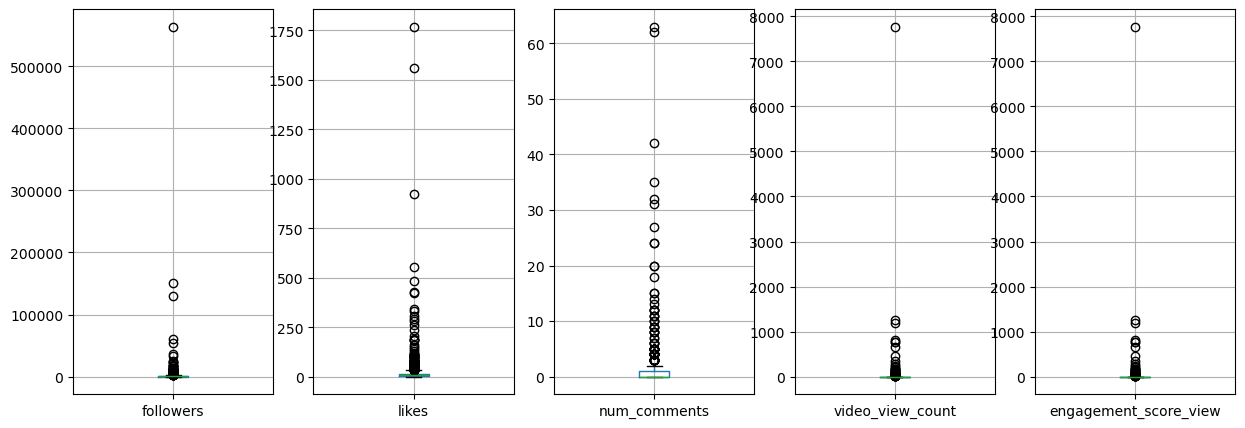

In [11]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
df.boxplot(column='followers', ax=ax[0])
df.boxplot(column='likes', ax=ax[1])
df.boxplot(column='num_comments', ax=ax[2])
df.boxplot(column='video_view_count', ax=ax[3])
df.boxplot(column='engagement_score_view', ax=ax[4])
plt.show()

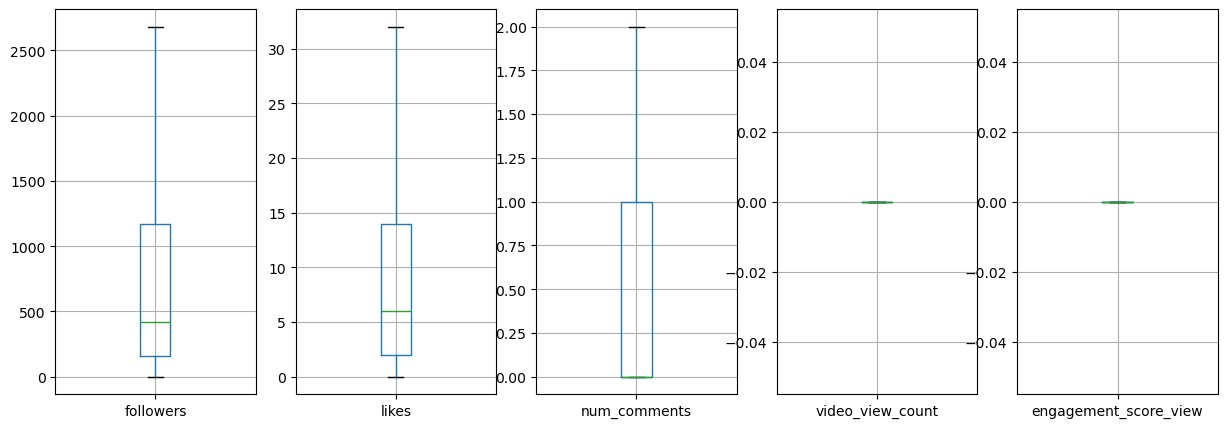

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
df.boxplot(column='followers', ax=ax[0], showfliers=False)
df.boxplot(column='likes', ax=ax[1], showfliers=False)
df.boxplot(column='num_comments', ax=ax[2], showfliers=False)
df.boxplot(column='video_view_count', ax=ax[3], showfliers=False)
df.boxplot(column='engagement_score_view', ax=ax[4], showfliers=False)
plt.show()

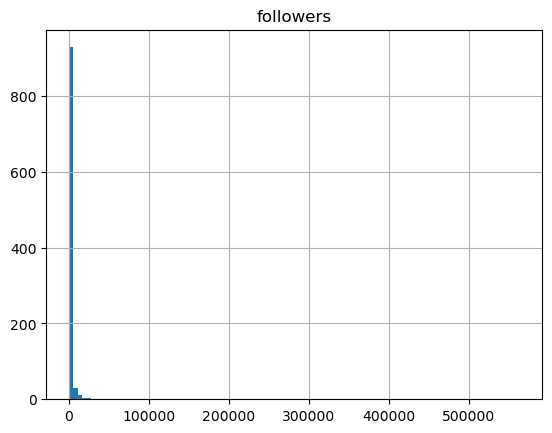

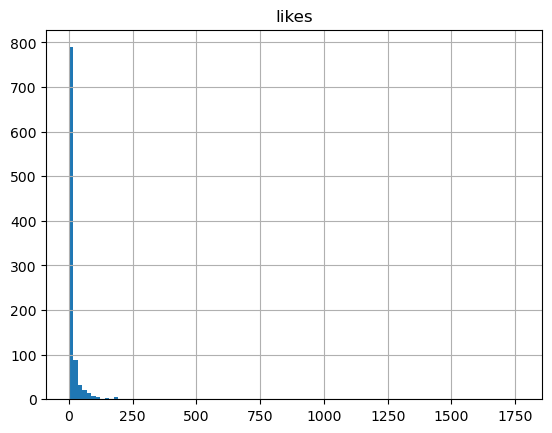

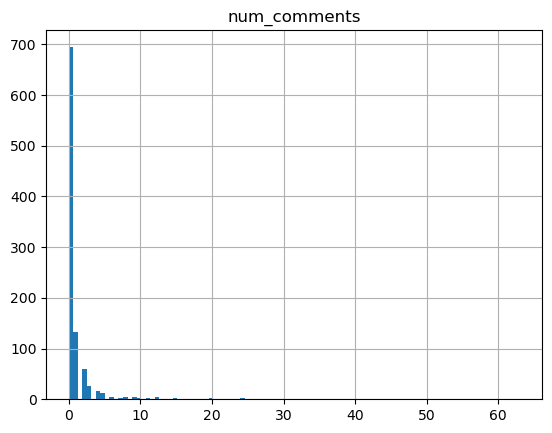

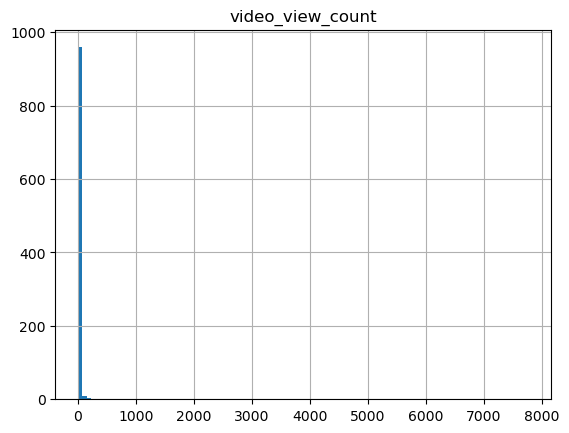

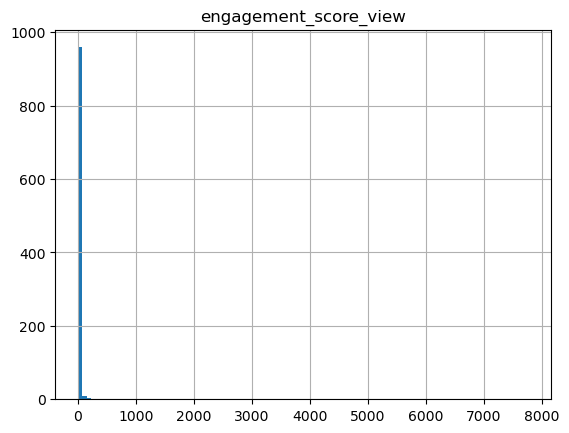

In [13]:
df.hist(column='followers', bins=100)
df.hist(column='likes', bins=100)
df.hist(column='num_comments', bins=100)
df.hist(column='video_view_count', bins=100)
df.hist(column='engagement_score_view', bins=100)
plt.show()

In [14]:
len(pd.DataFrame(df['video_view_count'] == df['engagement_score_view']))

983

- video_view_counts e engagement_score_view são iguais e tem quase todos os registros iguais a zero, melhor remover
- Nos demais dados numéricos remover outliers


In [15]:
df = df.drop(columns=['video_view_count', 'engagement_score_view'])
df

,content_type,followers,likes,num_comments,product_type,videos,tags,has_a_person,vape_present,is_vaping,...,people_skin_color,people_gender,people_age_group,people_physical_attributes,people_hair_color,people_common_appearances,depiction_style,is_vape_related,sensitive_content_bool,video_link_count
0,Image,1792,3,0,NaN,NaN,"['vaping', 'health warning', 'anti-vaping', 'n...",0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1,Image,159,2,0,NaN,NaN,"['infographic', 'teen brain', 'drug addiction'...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
2,Image,10174,12,0,NaN,NaN,"['smoking', 'quit smoking', 'health', 'cigaret...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
3,Image,9,3,0,NaN,NaN,"['vaping', 'comic', 'humor', 'indoor', 'youth']",1,1,1,...,NaN,"['Female', 'Male']",['Young'],NaN,NaN,['casual'],Neutral,1,0,0
4,Image,318,7,0,NaN,NaN,"['text message', 'gratitude', 'quitting smokin...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Image,183,4,0,NaN,NaN,"['cigarette', 'smoking', 'health warning', 'an...",0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1392,Image,2608,8,0,NaN,NaN,"['advertisement', 'support', 'quit smoking', '...",1,0,0,...,"['medium', 'light']","['Male', 'Male']","['Adult', 'Adult']","['average', 'average']","['black', 'black']","['casual', 'casual']",Attractive,1,0,0
1393,Image,11,0,0,NaN,NaN,"['vaping', 'youth', 'decision-making', 'health...",1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,1,0,0
1395,Image,521,71,3,NaN,NaN,"['outdoor', 'running', 'exercise', 'nature', '...",1,0,0,...,['light'],['Male'],['Adult'],['average'],['other'],['casual'],Neutral,1,0,0


# Tratamento de outliers

In [16]:
def get_outlier_indices(df, column):
    """
    Returns the indices of the outliers in a DataFrame column using the IQR method.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (df[column] < lower_bound) | (df[column] > upper_bound)

    return df[outlier_condition].index.tolist()

In [17]:
outl_followers = get_outlier_indices(df, 'followers')
outl_comments = get_outlier_indices(df, 'num_comments')
outl_likes = get_outlier_indices(df, 'likes')

#print len's
print(len(outl_followers))
print(len(outl_comments))
print(len(outl_likes))

set.intersection(set(outl_followers), set(outl_comments), set(outl_likes))

138
97
117


{29, 36, 79, 198, 211, 390, 443, 453, 472, 535, 542, 620, 654, 1028}

- simplesmente remover esses outliers reduziria a base em mais de 30%
- substituir pela média

In [18]:
#fill outlier indexes with column mean
df.loc[outl_followers, 'followers'] = df.loc[outl_followers, 'followers'].apply(lambda x: int(df['followers'].mean()))
df.loc[outl_comments, 'num_comments'] = df.loc[outl_comments, 'num_comments'].apply(lambda x: int(df['num_comments'].mean()))
df.loc[outl_likes, 'likes'] = df.loc[outl_likes, 'likes'].apply(lambda x: int(df['likes'].mean()))


# Análise de variáveis do tipo lista

- listas de itens multiplos
    - people_gender
    - people_skin_color
    - people_age_group
    - people_physical_attributes
    - people_common_appearances
    - people_hair_color

- listas de itens unicos

    - target_demographic
    - tags
    - post_style
    - type_of_content

In [19]:
len(get_possible_values(df, 'tags'))


918

- coluna tags tem muitos valores diferentes, remover para evitar dimensionalidade extremamente grande

In [20]:

#listas de itens multiplos -> contagem
col_names_people_gender = list_column_count_inplace(df, 'people_gender')
col_names_people_skin_color = list_column_count_inplace(df, 'people_skin_color')
col_names_people_age_group = list_column_count_inplace(df, 'people_age_group')
col_names_people_physical_attributes = list_column_count_inplace(df, 'people_physical_attributes')
col_names_people_common_appearances = list_column_count_inplace(df, 'people_common_appearances')
col_names_people_hair_color = list_column_count_inplace(df, 'people_hair_color')

#listas de itens unicos -> binarização
col_names_target_demographic = list_column_binarize_inplace(df, 'target_demographic')
#col_names_tags = list_column_binarize_inplace(df, 'tags')

df = df.copy()

# Análise de algumas variáveis indeterminadas
- post_style
- type_of_content


In [21]:
df['type_of_content'].unique()

array(['Advertisement', 'Informational Graphic', 'Humor Clip',
       'Testimonial Message', 'Health Warning',
       'Informational Presentation', 'Health Advertisement',
       'Informational Article', 'Motivational Quote', 'Health Campaign',
       'Informational Poster', 'Public Speech', 'Informational Image',
       'Social Commentary', 'Health Promotion', 'Product Advertisement',
       'Personal Reflection', 'Informational Video',
       'Testimonial Advertisement', 'Health Advice', 'Health Awareness',
       'News Article', 'Announcement', 'Awareness Campaign',
       'Social Media Post', 'Product Promotion',
       'Informational Promotion', 'Promotional Video', 'Public Message',
       'Informational Post', 'Music Video', 'Logo Design',
       'Informational Advertisement', 'Satirical Comic',
       'Informational Session', 'Campaign Advertisement', 'Meme Image',
       'Campaign Event', 'Testimonial Image', 'Health Education',
       'Informational Flyer', 'Meme Humor', 'Cli

In [22]:
df['post_style'].unique()

array(['Informational Announcement', 'Informational, Educational',
       'Informational Promotion', 'Humor', 'Personal Reflection',
       'Humor, Informational', 'Informational, Announcement',
       'Motivational, Informational', 'Promotion',
       'Informational, Health Warning', 'Informational', 'Opinion Piece',
       'Informational Campaign', 'Informational, Motivational',
       'Informational, Awareness', 'Humor, Meme', 'Humor, Promotion',
       'Casual Promotion', 'Informational, Prevention',
       'Informational, Health Awareness', 'Informational, Warning',
       'Informational, Campaign', 'Sarcastic Health Ad',
       'Informational, Advocacy', 'Informational, Health Advice',
       'Humor, Ironic', 'Informational, Health', 'Humor, Satire',
       'Humor, Relatable', 'Announcement', 'Motivational Testimonial',
       'Informational, Personal Reflection', 'Humor Sarcastic',
       'Informational Warning', 'Informational, Supportive',
       'Informational, Promotion', 'P

In [23]:
pd.Series(split_words(df, 'post_style')).value_counts()

Informational    41
Humor            17
Promotion        12
Health            9
Motivational      8
Warning           6
Announcement      6
Sarcastic         6
Reflection        5
Awareness         4
Personal          4
Inspirational     4
Opinion           3
Discussion        3
Artistic          3
Educational       2
Testimonial       2
Prevention        2
Casual            2
Supportive        2
Satire            2
Advice            2
Campaign          2
Quote             2
Ad                1
Piece             1
Meme              1
Relatable         1
Ironic            1
Advocacy          1
Reminder          1
Animation         1
Poster            1
Expression        1
Memes             1
Empowerment       1
Education         1
Summary           1
Advertisement     1
Message           1
Anti-Vaping       1
Encouragement     1
Environmental     1
Name: count, dtype: int64

In [24]:
pd.Series(split_words(df, 'type_of_content')).value_counts()

Informational    20
Health           15
Promotion        12
Campaign         10
Testimonial       9
                 ..
Street            1
Photography       1
Initiative        1
Success           1
Story             1
Name: count, Length: 85, dtype: int64

- parecem se comportar como as variáveis de lista. Sendo assim, foi feito o mesmo tratamento

In [25]:
df['post_style_array'] = df['post_style'].apply(to_array)
df['type_of_content_array'] = df['type_of_content'].apply(to_array)
col_names_post_style_array = list_column_binarize_inplace(df, 'post_style_array')
col_names_type_of_content_array = list_column_binarize_inplace(df, 'type_of_content_array')

/home/patrick/Desktop/Projects/Data-Mining/1-data-cleaning/utils.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column_name}_{value}'] = value_exists
/home/patrick/Desktop/Projects/Data-Mining/1-data-cleaning/utils.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{column_name}_{value}'] = value_exists
/home/patrick/Desktop/Projects/Data-Mining/1-data-cleaning/utils.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

# Análise de dados categóricos

- categóricos

    - content_type
    - tone
    - emotion_displayed
    - stance
    - depiction_style
    - product_type
    - location_type


In [26]:
df['content_type'].value_counts()

content_type
Image       790
Carousel    136
Reel         34
Video        23
Name: count, dtype: int64

In [27]:
df['tone'].value_counts()

tone
Negative     446
Positive     340
Neutral      160
Sarcastic     37
Name: count, dtype: int64

In [28]:
df['emotion_displayed'].value_counts()

emotion_displayed
happiness        94
neutral          26
concern           9
thoughtful        6
stress            5
determination     4
engagement        4
confidence        4
excitement        3
sadness           3
serious           3
amusement         2
contemplative     2
seriousness       2
relaxed           2
contentment       2
distress          2
calm              2
supportive        2
intensity         1
annoyance         1
curiosity         1
tired             1
playful           1
frustration       1
calmness          1
contemplation     1
motivation        1
surprise          1
support           1
focused           1
approval          1
somber            1
disapproval       1
humor             1
pain              1
grumpiness        1
displeasure       1
pride             1
relief            1
anxiety           1
alarm             1
Name: count, dtype: int64

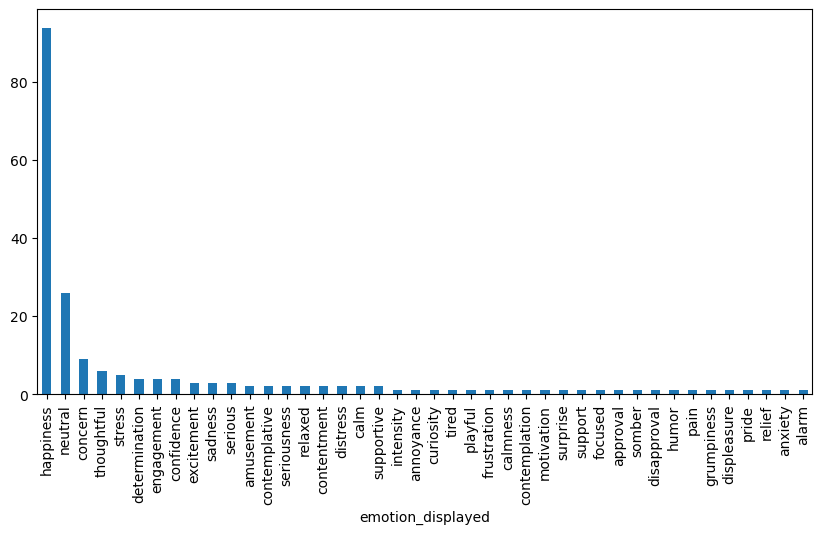

In [29]:
plt.figure(figsize=(10, 5))
df['emotion_displayed'].value_counts().plot(kind='bar')
plt.show()

- maior parte dos dados não nulos concentrados em 'happines' e 'neutral', suporte muito baixo para outras emoções
- converter essa coluna uma que indica se alguma emoção foi identificada ou julgar quais seriam positivas, negativas ou neutras (3 categorias)

In [30]:
df['stance'].value_counts()

stance
Anti-Vaping    933
Neutral         48
Pro-Vaping       2
Name: count, dtype: int64

In [31]:
df['depiction_style'].value_counts()

depiction_style
Neutral       423
Attractive     22
Name: count, dtype: int64

In [32]:
df['product_type'].value_counts()

product_type
feed    51
igtv     6
Name: count, dtype: int64

In [33]:
df['location_type'].value_counts()

location_type
Public        508
Indoor        278
Outdoor       122
Neutral        37
Private        20
Commercial     18
Name: count, dtype: int64

- product_type tem muitos valores faltantes (vide Análise de valores nulos) e baixo suporte para suas categorias
- quase todos tem 'stance' anti-vaping: remover
- em 'depiction_style' os que não são nulo são quase todos Neutral: remover

In [34]:
df = df.drop(columns=['product_type', 'stance', 'depiction_style'])

#### revisita remoção de valores ausentes

In [35]:
df['emotion_displayed'] = df['emotion_displayed'].fillna("other")
df['tone'] = df['tone'].fillna("other")


# Análise de variáveis binárias

- has_a_person
- vape_present
- is_vaping
- are_there_children
- Health_ad
- is_vape_related
- sensitive_content_bool
- img_mentions_brands
- text_mentions_brands

In [36]:
def count_binary(df, col_names):
    aux_df = df[col_names]
    counts = pd.DataFrame(aux_df.sum(), columns=["count"])
    counts.sort_values(by="count", ascending=False, inplace=True)
    return counts

In [37]:
count_binary(df, ['has_a_person'])

,count
has_a_person,432


In [38]:
count_binary(df, ['vape_present'])

,count
vape_present,278


In [39]:
count_binary(df, ['is_vaping'])

,count
is_vaping,74


In [40]:
count_binary(df, ['are_there_children'])

,count
are_there_children,39


In [41]:
count_binary(df, ['Health_ad'])

,count
Health_ad,822


In [42]:
count_binary(df, ['is_vape_related'])

,count
is_vape_related,983


In [43]:
count_binary(df, ['sensitive_content_bool'])

,count
sensitive_content_bool,55


In [44]:
count_binary(df, ['img_mentions_brands'])

,count
img_mentions_brands,268


In [45]:
count_binary(df, ['text_mentions_brands'])

,count
text_mentions_brands,151


- todas instâncias tem o valor 1 para 'is_vape_related'
- quase todas são 'Health_ads' (remover?)

In [46]:
df = df.drop(columns = ['is_vape_related'])

# Análise de variáveis transformadas em grupos de variáveis binárias


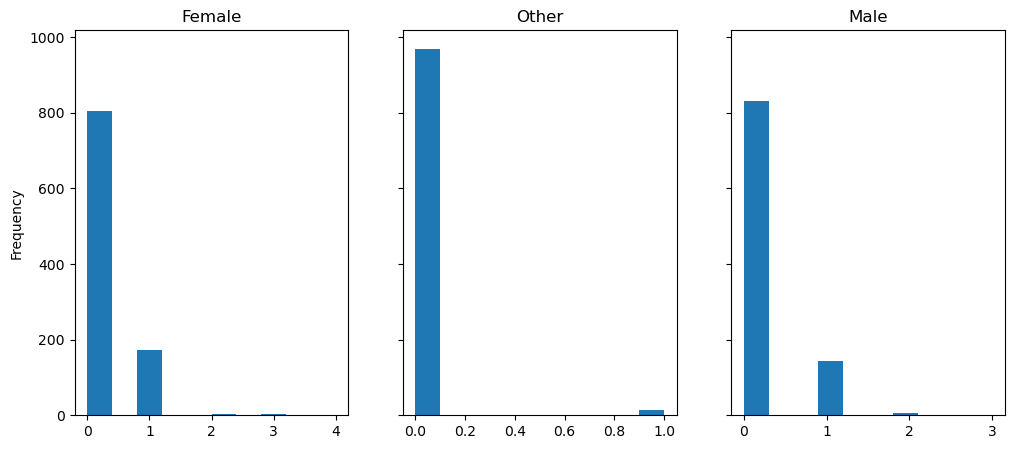

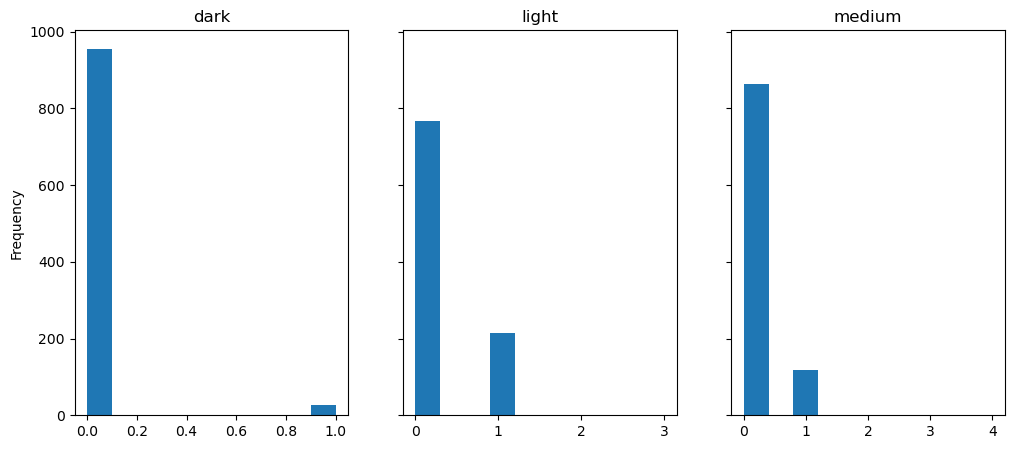

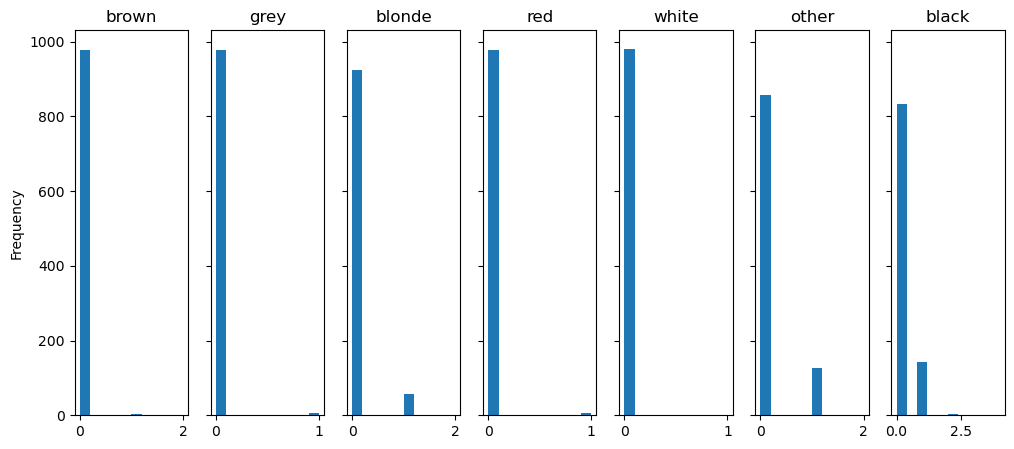

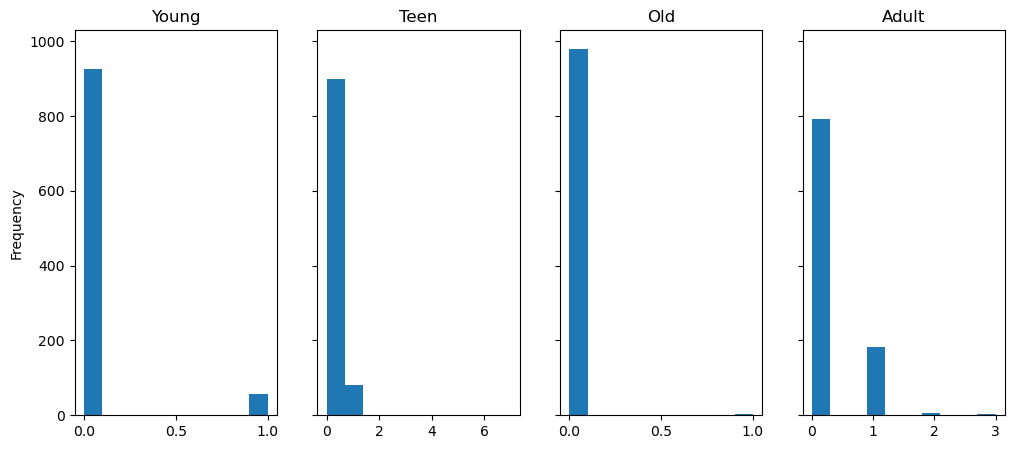

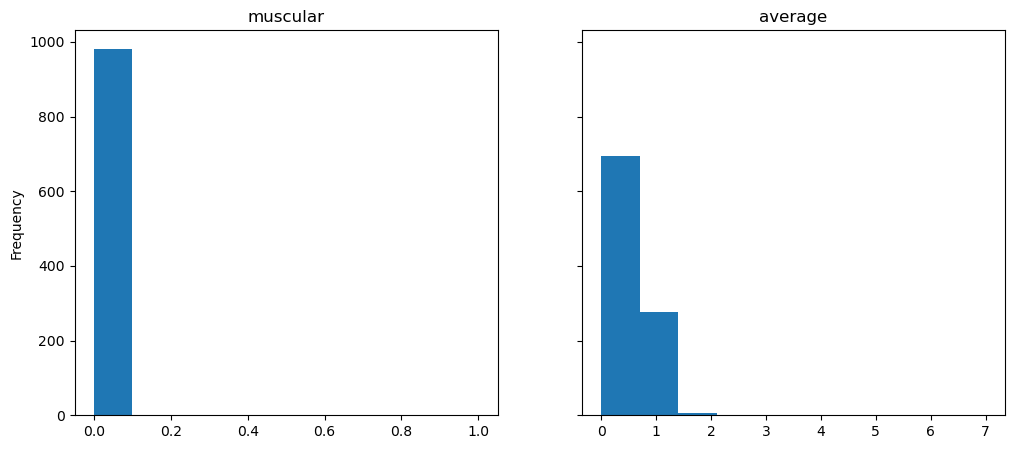

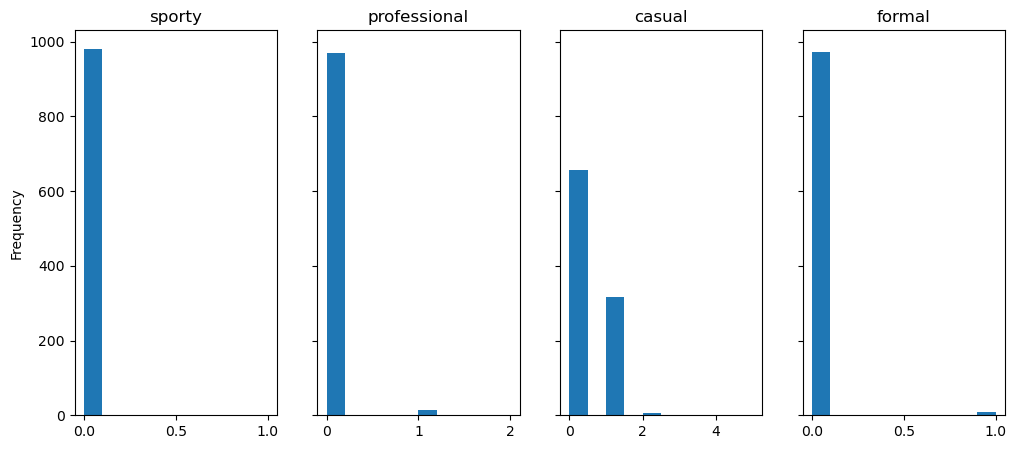

In [47]:
plot_histograms_for_col_group(df, col_names_people_gender)
plot_histograms_for_col_group(df, col_names_people_skin_color)
plot_histograms_for_col_group(df, col_names_people_hair_color)
plot_histograms_for_col_group(df, col_names_people_age_group)
plot_histograms_for_col_group(df, col_names_people_physical_attributes)
plot_histograms_for_col_group(df, col_names_people_common_appearances)

In [48]:
post_style_counts = count_binarized_group(df, col_names_post_style_array)
post_style_counts


,count
post_style_array_Informational,808
post_style_array_Promotion,433
post_style_array_Announcement,162
post_style_array_Reflection,51
post_style_array_Personal,50
post_style_array_Humor,45
post_style_array_Awareness,27
post_style_array_Warning,27
post_style_array_Health,23
post_style_array_Motivational,22


<Axes: >

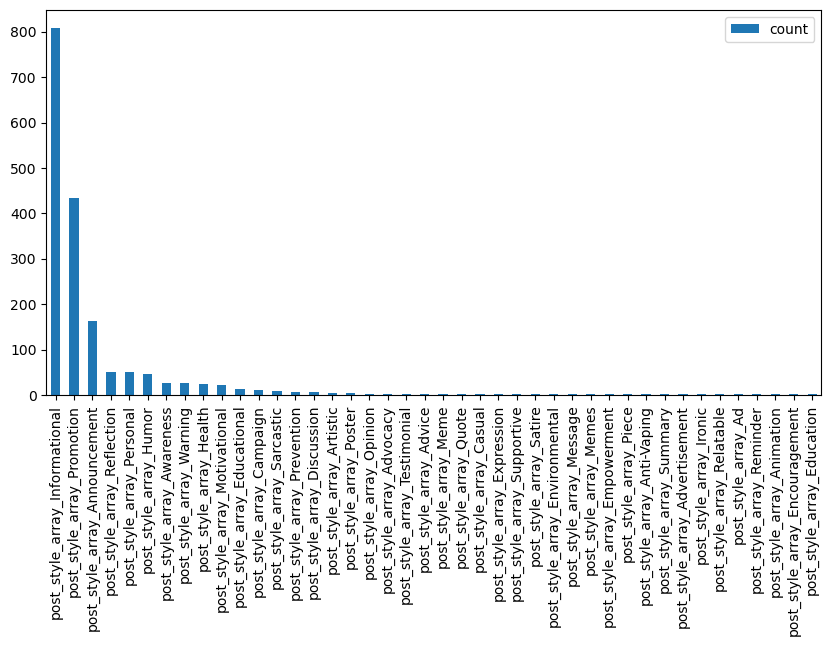

In [49]:
post_style_counts.plot(kind='bar', figsize=(10, 5))

In [50]:
type_of_content_counts = count_binarized_group(df, col_names_type_of_content_array)
type_of_content_counts

,count
type_of_content_array_Health,384
type_of_content_array_Advertisement,298
type_of_content_array_Informational,148
type_of_content_array_Warning,122
type_of_content_array_Campaign,112
...,...
type_of_content_array_Story,1
type_of_content_array_Religious,1
type_of_content_array_Digital,1
type_of_content_array_Interview,1


<Axes: >

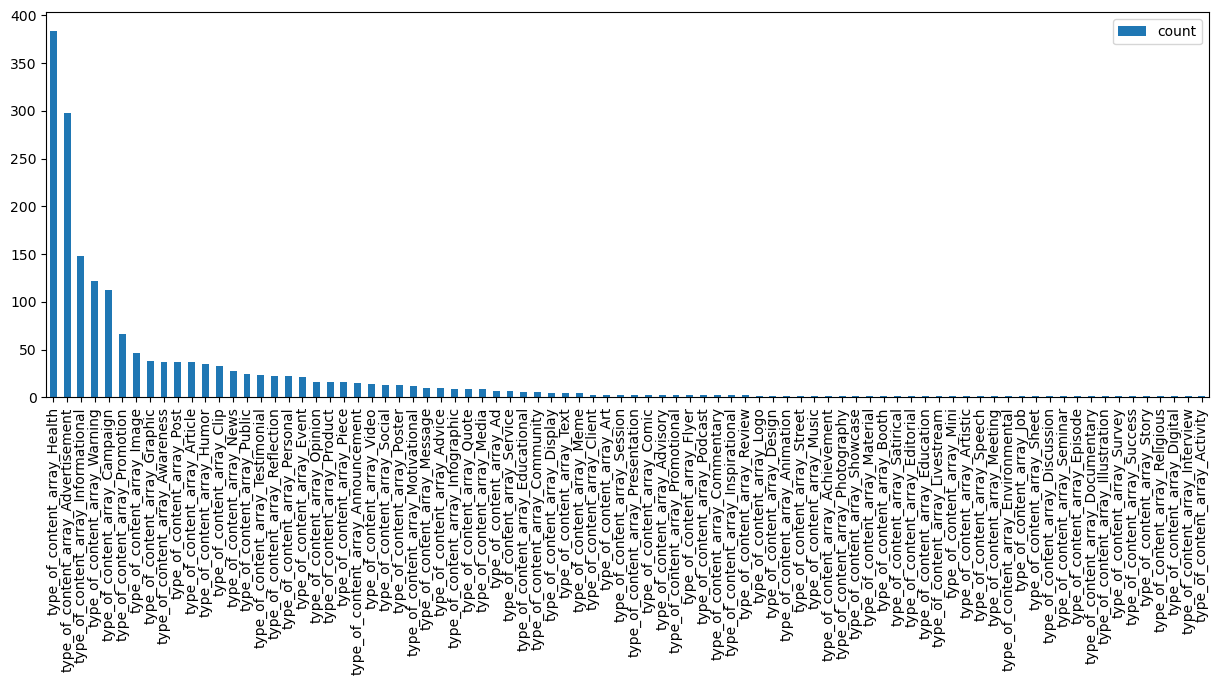

In [51]:
type_of_content_counts.plot(kind='bar', figsize=(15, 5))

In [52]:
target_demographic_counts = count_binarized_group(df, col_names_target_demographic)
target_demographic_counts

,count
target_demographic_general audience,586
target_demographic_young adults,408
target_demographic_teenagers,269
target_demographic_adults,230
target_demographic_parents,40
target_demographic_smokers,19
target_demographic_professionals,9
target_demographic_educators,8
target_demographic_youth,7
target_demographic_students,6


<Axes: >

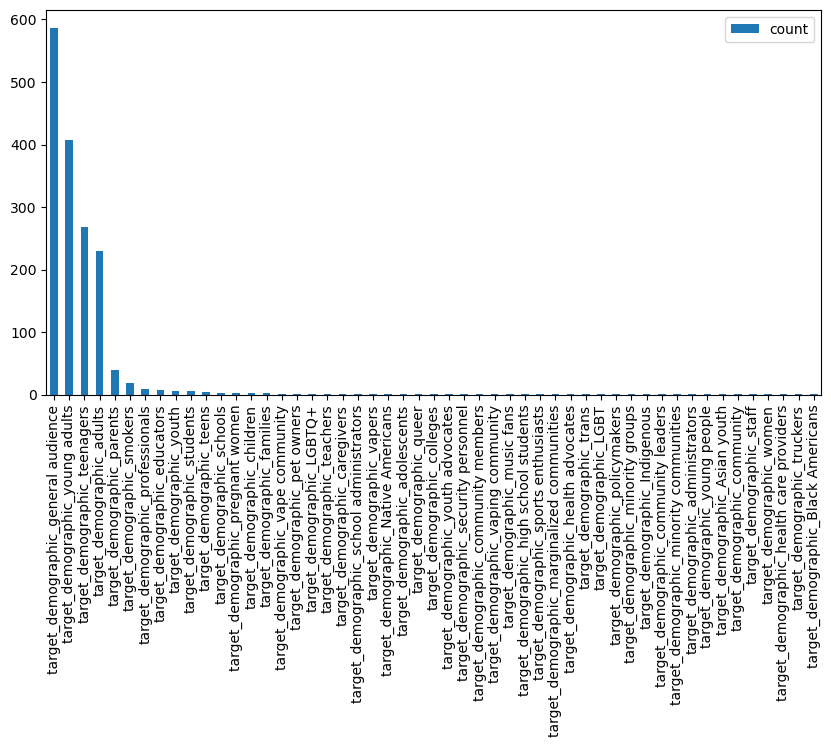

In [53]:
target_demographic_counts.plot(kind='bar', figsize=(10, 5))

- Muitas colunas geradas tem quase todos valores iguais a zero
    - people_gender_Other
    - people_skin_color_dark
    - people_skin_color_brown
    - people_skin_white_brown
    - people_skin_gray_brown
    - people_skin_red_brown
    - people_age_group_old
    - people_physical_attributes_muscular
    - people_common_appearances_sporty
    - people_common_appearances_formal
    - people_common_appearances_professional
    - people_common_appearances_sporty


- No caso de people_physical_attributes e people_common_appearances, só sobra 1 variável, talvez remover esses grupos
- boa parte dos públicos alvo quase não aparece, mas alguns aparecem com frequência. O mesmo ocorre em post_style
- Isso também ocorre no type of content, mas os valores estão um pouco mais espalhados. De qualquer forma alguns são muito específicos
-

- eliminar as colunas a partir de um ponto de corte
-

In [54]:

below_threshold = []
below_threshold.extend(post_style_counts[post_style_counts['count'] < 100].index.tolist())
below_threshold.extend(type_of_content_counts[type_of_content_counts['count'] < 66].index.tolist())
below_threshold.extend(target_demographic_counts[target_demographic_counts['count'] < 200].index.tolist())
below_threshold

['post_style_array_Reflection',
 'post_style_array_Personal',
 'post_style_array_Humor',
 'post_style_array_Awareness',
 'post_style_array_Warning',
 'post_style_array_Health',
 'post_style_array_Motivational',
 'post_style_array_Educational',
 'post_style_array_Campaign',
 'post_style_array_Sarcastic',
 'post_style_array_Prevention',
 'post_style_array_Discussion',
 'post_style_array_Artistic',
 'post_style_array_Poster',
 'post_style_array_Opinion',
 'post_style_array_Advocacy',
 'post_style_array_Testimonial',
 'post_style_array_Advice',
 'post_style_array_Meme',
 'post_style_array_Quote',
 'post_style_array_Casual',
 'post_style_array_Expression',
 'post_style_array_Supportive',
 'post_style_array_Satire',
 'post_style_array_Environmental',
 'post_style_array_Message',
 'post_style_array_Memes',
 'post_style_array_Empowerment',
 'post_style_array_Piece',
 'post_style_array_Anti-Vaping',
 'post_style_array_Summary',
 'post_style_array_Advertisement',
 'post_style_array_Ironic',
 'po

In [55]:
df = df.drop(columns = below_threshold)
df

,content_type,followers,likes,num_comments,videos,tags,has_a_person,vape_present,is_vaping,tone,...,post_style_array_Informational,post_style_array_Promotion,post_style_array_Announcement,type_of_content_array_Initiative,type_of_content_array_Advertisement,type_of_content_array_Promotion,type_of_content_array_Health,type_of_content_array_Campaign,type_of_content_array_Informational,type_of_content_array_Warning
0,Image,1792,3,0,NaN,"['vaping', 'health warning', 'anti-vaping', 'n...",0,1,0,Negative,...,1,0,1,0,1,0,0,0,0,0
1,Image,159,2,0,NaN,"['infographic', 'teen brain', 'drug addiction'...",0,0,0,Negative,...,1,0,0,0,0,0,0,0,1,0
2,Image,2389,12,0,NaN,"['smoking', 'quit smoking', 'health', 'cigaret...",0,0,0,Negative,...,1,1,0,0,1,0,0,0,0,0
3,Image,9,3,0,NaN,"['vaping', 'comic', 'humor', 'indoor', 'youth']",1,1,1,Sarcastic,...,0,0,0,0,0,0,0,0,0,0
4,Image,318,7,0,NaN,"['text message', 'gratitude', 'quitting smokin...",0,0,0,Positive,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Image,183,4,0,NaN,"['cigarette', 'smoking', 'health warning', 'an...",0,0,0,Negative,...,1,0,0,0,0,0,1,0,0,1
1392,Image,2608,8,0,NaN,"['advertisement', 'support', 'quit smoking', '...",1,0,0,Positive,...,1,1,0,0,1,0,0,0,0,0
1393,Image,11,0,0,NaN,"['vaping', 'youth', 'decision-making', 'health...",1,0,0,Negative,...,1,0,0,0,0,0,1,0,0,1
1395,Image,521,22,1,NaN,"['outdoor', 'running', 'exercise', 'nature', '...",1,0,0,Positive,...,0,0,0,0,0,0,0,0,0,0


# Separar variáveis numéricas para a próxima etapa

In [56]:
non_numeric_cols = [
    # listas de itens multiplos
    'people_gender',
    'people_skin_color',
    'people_age_group',
    'people_physical_attributes',
    'people_common_appearances',
    'people_hair_color',

    # listas de itens unicos
    'target_demographic',
    'tags',
    'post_style',
    'type_of_content',

    # categóricos
    'content_type',
    'tone',
    'emotion_displayed',
    #'stance',
    #'depiction_style',
    #'product_type',
    'location_type',

    #others
    'videos',
    'type_of_content_array',
    'post_style_array'
]

df_numeric = df.copy()
df_numeric.drop(columns=non_numeric_cols, inplace=True)
df_numeric

,followers,likes,num_comments,has_a_person,vape_present,is_vaping,img_mentions_brands,text_mentions_brands,Health_ad,are_there_children,...,post_style_array_Informational,post_style_array_Promotion,post_style_array_Announcement,type_of_content_array_Initiative,type_of_content_array_Advertisement,type_of_content_array_Promotion,type_of_content_array_Health,type_of_content_array_Campaign,type_of_content_array_Informational,type_of_content_array_Warning
0,1792,3,0,0,1,0,1,1,1,0,...,1,0,1,0,1,0,0,0,0,0
1,159,2,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,2389,12,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
3,9,3,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,318,7,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,183,4,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
1392,2608,8,0,1,0,0,1,1,1,0,...,1,1,0,0,1,0,0,0,0,0
1393,11,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
1395,521,22,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Normalização


In [57]:
pd.concat([df[non_numeric_cols], df_numeric], axis=1, join='outer')

,people_gender,people_skin_color,people_age_group,people_physical_attributes,people_common_appearances,people_hair_color,target_demographic,tags,post_style,type_of_content,...,post_style_array_Informational,post_style_array_Promotion,post_style_array_Announcement,type_of_content_array_Initiative,type_of_content_array_Advertisement,type_of_content_array_Promotion,type_of_content_array_Health,type_of_content_array_Campaign,type_of_content_array_Informational,type_of_content_array_Warning
0,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'parents', 'general audience']","['vaping', 'health warning', 'anti-vaping', 'n...",Informational Announcement,Advertisement,...,1,0,1,0,1,0,0,0,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'young adults']","['infographic', 'teen brain', 'drug addiction'...","Informational, Educational",Informational Graphic,...,1,0,0,0,0,0,0,0,1,0
2,NaN,NaN,NaN,NaN,NaN,NaN,"['smokers', 'general audience']","['smoking', 'quit smoking', 'health', 'cigaret...",Informational Promotion,Advertisement,...,1,1,0,0,1,0,0,0,0,0
3,"['Female', 'Male']",NaN,['Young'],NaN,['casual'],NaN,"['young adults', 'teenagers']","['vaping', 'comic', 'humor', 'indoor', 'youth']",Humor,Humor Clip,...,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,"['adults', 'general audience']","['text message', 'gratitude', 'quitting smokin...",Personal Reflection,Testimonial Message,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,NaN,NaN,NaN,NaN,NaN,NaN,['general audience'],"['cigarette', 'smoking', 'health warning', 'an...",Informational,Health Warning,...,1,0,0,0,0,0,1,0,0,1
1392,"['Male', 'Male']","['medium', 'light']","['Adult', 'Adult']","['average', 'average']","['casual', 'casual']","['black', 'black']","['young adults', 'adults', 'general audience']","['advertisement', 'support', 'quit smoking', '...",Informational Promotion,Advertisement,...,1,1,0,0,1,0,0,0,0,0
1393,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'young adults']","['vaping', 'youth', 'decision-making', 'health...",Informational,Health Warning,...,1,0,0,0,0,0,1,0,0,1
1395,['Male'],['light'],['Adult'],['average'],['casual'],['other'],"['young adults', 'adults']","['outdoor', 'running', 'exercise', 'nature', '...",Personal Reflection,Personal Reflection,...,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df_numeric)
scaled_numeric_df = pd.DataFrame(scaled, columns=df_numeric.columns, index=df_numeric.index)

In [59]:
df[non_numeric_cols]

,people_gender,people_skin_color,people_age_group,people_physical_attributes,people_common_appearances,people_hair_color,target_demographic,tags,post_style,type_of_content,content_type,tone,emotion_displayed,location_type,videos,type_of_content_array,post_style_array
0,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'parents', 'general audience']","['vaping', 'health warning', 'anti-vaping', 'n...",Informational Announcement,Advertisement,Image,Negative,other,Public,NaN,['Advertisement'],"['Informational', 'Announcement']"
1,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'young adults']","['infographic', 'teen brain', 'drug addiction'...","Informational, Educational",Informational Graphic,Image,Negative,other,Public,NaN,"['Informational', 'Graphic']","['Informational', 'Educational']"
2,NaN,NaN,NaN,NaN,NaN,NaN,"['smokers', 'general audience']","['smoking', 'quit smoking', 'health', 'cigaret...",Informational Promotion,Advertisement,Image,Negative,other,Indoor,NaN,['Advertisement'],"['Informational', 'Promotion']"
3,"['Female', 'Male']",NaN,['Young'],NaN,['casual'],NaN,"['young adults', 'teenagers']","['vaping', 'comic', 'humor', 'indoor', 'youth']",Humor,Humor Clip,Image,Sarcastic,annoyance,Indoor,NaN,"['Humor', 'Clip']",['Humor']
4,NaN,NaN,NaN,NaN,NaN,NaN,"['adults', 'general audience']","['text message', 'gratitude', 'quitting smokin...",Personal Reflection,Testimonial Message,Image,Positive,other,Private,NaN,"['Testimonial', 'Message']","['Personal', 'Reflection']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,NaN,NaN,NaN,NaN,NaN,NaN,['general audience'],"['cigarette', 'smoking', 'health warning', 'an...",Informational,Health Warning,Image,Negative,other,Public,NaN,"['Health', 'Warning']",['Informational']
1392,"['Male', 'Male']","['medium', 'light']","['Adult', 'Adult']","['average', 'average']","['casual', 'casual']","['black', 'black']","['young adults', 'adults', 'general audience']","['advertisement', 'support', 'quit smoking', '...",Informational Promotion,Advertisement,Image,Positive,happiness,Public,NaN,['Advertisement'],"['Informational', 'Promotion']"
1393,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'young adults']","['vaping', 'youth', 'decision-making', 'health...",Informational,Health Warning,Image,Negative,other,Public,NaN,"['Health', 'Warning']",['Informational']
1395,['Male'],['light'],['Adult'],['average'],['casual'],['other'],"['young adults', 'adults']","['outdoor', 'running', 'exercise', 'nature', '...",Personal Reflection,Personal Reflection,Image,Positive,happiness,Outdoor,NaN,"['Personal', 'Reflection']","['Personal', 'Reflection']"


In [60]:
scaled_numeric_df

,followers,likes,num_comments,has_a_person,vape_present,is_vaping,img_mentions_brands,text_mentions_brands,Health_ad,are_there_children,...,post_style_array_Informational,post_style_array_Promotion,post_style_array_Announcement,type_of_content_array_Initiative,type_of_content_array_Advertisement,type_of_content_array_Promotion,type_of_content_array_Health,type_of_content_array_Campaign,type_of_content_array_Informational,type_of_content_array_Warning
0,0.668284,0.09375,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.058955,0.06250,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.891045,0.37500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.002985,0.09375,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.118284,0.21875,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,0.067910,0.12500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1392,0.972761,0.25000,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1393,0.003731,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1395,0.194030,0.68750,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df[non_numeric_cols]

,people_gender,people_skin_color,people_age_group,people_physical_attributes,people_common_appearances,people_hair_color,target_demographic,tags,post_style,type_of_content,content_type,tone,emotion_displayed,location_type,videos,type_of_content_array,post_style_array
0,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'parents', 'general audience']","['vaping', 'health warning', 'anti-vaping', 'n...",Informational Announcement,Advertisement,Image,Negative,other,Public,NaN,['Advertisement'],"['Informational', 'Announcement']"
1,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'young adults']","['infographic', 'teen brain', 'drug addiction'...","Informational, Educational",Informational Graphic,Image,Negative,other,Public,NaN,"['Informational', 'Graphic']","['Informational', 'Educational']"
2,NaN,NaN,NaN,NaN,NaN,NaN,"['smokers', 'general audience']","['smoking', 'quit smoking', 'health', 'cigaret...",Informational Promotion,Advertisement,Image,Negative,other,Indoor,NaN,['Advertisement'],"['Informational', 'Promotion']"
3,"['Female', 'Male']",NaN,['Young'],NaN,['casual'],NaN,"['young adults', 'teenagers']","['vaping', 'comic', 'humor', 'indoor', 'youth']",Humor,Humor Clip,Image,Sarcastic,annoyance,Indoor,NaN,"['Humor', 'Clip']",['Humor']
4,NaN,NaN,NaN,NaN,NaN,NaN,"['adults', 'general audience']","['text message', 'gratitude', 'quitting smokin...",Personal Reflection,Testimonial Message,Image,Positive,other,Private,NaN,"['Testimonial', 'Message']","['Personal', 'Reflection']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,NaN,NaN,NaN,NaN,NaN,NaN,['general audience'],"['cigarette', 'smoking', 'health warning', 'an...",Informational,Health Warning,Image,Negative,other,Public,NaN,"['Health', 'Warning']",['Informational']
1392,"['Male', 'Male']","['medium', 'light']","['Adult', 'Adult']","['average', 'average']","['casual', 'casual']","['black', 'black']","['young adults', 'adults', 'general audience']","['advertisement', 'support', 'quit smoking', '...",Informational Promotion,Advertisement,Image,Positive,happiness,Public,NaN,['Advertisement'],"['Informational', 'Promotion']"
1393,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'young adults']","['vaping', 'youth', 'decision-making', 'health...",Informational,Health Warning,Image,Negative,other,Public,NaN,"['Health', 'Warning']",['Informational']
1395,['Male'],['light'],['Adult'],['average'],['casual'],['other'],"['young adults', 'adults']","['outdoor', 'running', 'exercise', 'nature', '...",Personal Reflection,Personal Reflection,Image,Positive,happiness,Outdoor,NaN,"['Personal', 'Reflection']","['Personal', 'Reflection']"


In [62]:
df_scaled = pd.concat([df[non_numeric_cols], scaled_numeric_df], axis=1, join='outer')
df_scaled

,people_gender,people_skin_color,people_age_group,people_physical_attributes,people_common_appearances,people_hair_color,target_demographic,tags,post_style,type_of_content,...,post_style_array_Informational,post_style_array_Promotion,post_style_array_Announcement,type_of_content_array_Initiative,type_of_content_array_Advertisement,type_of_content_array_Promotion,type_of_content_array_Health,type_of_content_array_Campaign,type_of_content_array_Informational,type_of_content_array_Warning
0,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'parents', 'general audience']","['vaping', 'health warning', 'anti-vaping', 'n...",Informational Announcement,Advertisement,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'young adults']","['infographic', 'teen brain', 'drug addiction'...","Informational, Educational",Informational Graphic,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,"['smokers', 'general audience']","['smoking', 'quit smoking', 'health', 'cigaret...",Informational Promotion,Advertisement,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,"['Female', 'Male']",NaN,['Young'],NaN,['casual'],NaN,"['young adults', 'teenagers']","['vaping', 'comic', 'humor', 'indoor', 'youth']",Humor,Humor Clip,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,"['adults', 'general audience']","['text message', 'gratitude', 'quitting smokin...",Personal Reflection,Testimonial Message,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,NaN,NaN,NaN,NaN,NaN,NaN,['general audience'],"['cigarette', 'smoking', 'health warning', 'an...",Informational,Health Warning,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1392,"['Male', 'Male']","['medium', 'light']","['Adult', 'Adult']","['average', 'average']","['casual', 'casual']","['black', 'black']","['young adults', 'adults', 'general audience']","['advertisement', 'support', 'quit smoking', '...",Informational Promotion,Advertisement,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1393,NaN,NaN,NaN,NaN,NaN,NaN,"['teenagers', 'young adults']","['vaping', 'youth', 'decision-making', 'health...",Informational,Health Warning,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1395,['Male'],['light'],['Adult'],['average'],['casual'],['other'],"['young adults', 'adults']","['outdoor', 'running', 'exercise', 'nature', '...",Personal Reflection,Personal Reflection,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise de correlação

In [63]:
df_numeric.corr()

,followers,likes,num_comments,has_a_person,vape_present,is_vaping,img_mentions_brands,text_mentions_brands,Health_ad,are_there_children,...,post_style_array_Informational,post_style_array_Promotion,post_style_array_Announcement,type_of_content_array_Initiative,type_of_content_array_Advertisement,type_of_content_array_Promotion,type_of_content_array_Health,type_of_content_array_Campaign,type_of_content_array_Informational,type_of_content_array_Warning
followers,1.000000,0.341107,0.126530,0.096618,0.028198,0.030879,0.008826,0.097526,-0.006709,-0.004923,...,-0.038047,0.098765,0.053727,0.034907,0.096389,0.054111,0.001971,-0.056773,-0.033526,-0.054597
likes,0.341107,1.000000,0.413388,0.028767,0.000927,0.022327,-0.108003,-0.057015,-0.255925,0.015645,...,-0.127776,-0.151898,0.083091,0.011523,-0.168411,0.018802,-0.107251,-0.019521,0.032594,-0.016408
num_comments,0.126530,0.413388,1.000000,-0.001299,-0.014105,-0.021297,-0.027566,-0.031476,-0.189469,-0.033833,...,-0.116107,-0.133948,0.067031,-0.019122,-0.118793,-0.002966,-0.103228,-0.063569,0.030989,0.013985
has_a_person,0.096618,0.028767,-0.001299,1.000000,0.035622,0.314463,-0.086431,-0.007731,-0.145357,0.229552,...,-0.123732,0.044214,-0.061845,0.036039,-0.022129,0.073668,-0.028386,-0.007875,-0.091942,-0.065992
vape_present,0.028198,0.000927,-0.014105,0.035622,1.000000,0.454366,-0.085179,-0.035733,-0.021167,-0.058203,...,0.085570,-0.124924,0.013304,-0.020039,-0.060334,-0.114313,0.066677,-0.054559,0.007229,0.202088
is_vaping,0.030879,0.022327,-0.021297,0.314463,0.454366,1.000000,-0.079440,-0.025313,-0.040424,-0.038240,...,-0.008326,-0.058996,-0.002030,-0.009105,-0.028802,-0.061139,-0.022977,-0.053774,-0.044651,0.032930
img_mentions_brands,0.008826,-0.108003,-0.027566,-0.086431,-0.085179,-0.079440,1.000000,0.486772,0.054902,0.004298,...,-0.067416,0.294268,-0.050287,0.052123,0.247295,0.100464,0.015490,0.010532,-0.091666,-0.119599
text_mentions_brands,0.097526,-0.057015,-0.031476,-0.007731,-0.035733,-0.025313,0.486772,1.000000,0.013200,0.000132,...,-0.133625,0.190303,-0.090381,-0.013595,0.154832,0.054806,-0.057750,-0.010695,-0.053129,-0.057679
Health_ad,-0.006709,-0.255925,-0.189469,-0.145357,-0.021167,-0.040424,0.054902,0.013200,1.000000,-0.008624,...,0.455137,0.198884,0.092861,0.014123,0.166309,0.041845,0.343079,0.141397,0.063338,0.149918
are_there_children,-0.004923,0.015645,-0.033833,0.229552,-0.058203,-0.038240,0.004298,0.000132,-0.008624,1.000000,...,-0.041649,-0.064868,0.134475,-0.006486,-0.032010,0.028769,0.008172,0.025530,0.016441,-0.013283


In [64]:

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Unstack to get pairs
corr_pairs = corr_matrix.unstack()

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicate pairs (e.g., (A,B) and (B,A))
corr_pairs = corr_pairs.groupby(lambda x: frozenset(x)).mean()

# Convert to DataFrame
corr_df = pd.DataFrame([(tuple(p), v) for p, v in corr_pairs.items()], columns=["pair", "correlation"])

# Sort by absolute correlation
corr_df["abs_correlation"] = corr_df["correlation"].abs()
corr_df = corr_df.sort_values(by="abs_correlation", ascending=False).drop(columns="abs_correlation")

corr_df.reset_index(drop=True, inplace=True)

In [65]:
corr_df[~pd.isna(corr_df['correlation'])]


,pair,correlation
0,"(people_common_appearances_casual, people_phys...",0.798520
1,"(people_hair_color_black, people_skin_color_me...",0.755853
2,"(people_skin_color_light, people_physical_attr...",0.749509
3,"(has_a_person, people_common_appearances_casual)",0.743811
4,"(people_physical_attributes_average, people_ge...",0.742785
...,...,...
1270,"(post_style_array_Announcement, people_hair_co...",0.000341
1271,"(target_demographic_general audience, video_li...",0.000327
1272,"(likes, target_demographic_Black community)",-0.000264
1273,"(people_physical_attributes_muscular, likes)",-0.000264


In [66]:
high_correlation_cols = corr_df[corr_df['correlation'] ==1]['pair'].apply(lambda x: x[1])
high_correlation_cols.values.tolist()

[]

# Eliminar colunas já transformadas ou muito correlacionadas


In [67]:

cols = ['people_gender',
'people_skin_color',
'people_age_group',
'people_physical_attributes',
'people_common_appearances',
'people_hair_color',
'target_demographic',
'tags',
'post_style',
'type_of_content',
'videos',
'type_of_content_array',
'post_style_array']

df_scaled = df_scaled.drop(columns=cols)
df_scaled = df_scaled.drop(columns=high_correlation_cols)

df_scaled


,content_type,tone,emotion_displayed,location_type,followers,likes,num_comments,has_a_person,vape_present,is_vaping,...,post_style_array_Informational,post_style_array_Promotion,post_style_array_Announcement,type_of_content_array_Initiative,type_of_content_array_Advertisement,type_of_content_array_Promotion,type_of_content_array_Health,type_of_content_array_Campaign,type_of_content_array_Informational,type_of_content_array_Warning
0,Image,Negative,other,Public,0.668284,0.09375,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Image,Negative,other,Public,0.058955,0.06250,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Image,Negative,other,Indoor,0.891045,0.37500,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Image,Sarcastic,annoyance,Indoor,0.002985,0.09375,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Image,Positive,other,Private,0.118284,0.21875,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,Image,Negative,other,Public,0.067910,0.12500,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1392,Image,Positive,happiness,Public,0.972761,0.25000,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1393,Image,Negative,other,Public,0.003731,0.00000,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1395,Image,Positive,happiness,Outdoor,0.194030,0.68750,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
len(df_scaled)

983

In [69]:
df_scaled.to_csv("preprocessing_result1.csv", index=False)